In [7]:
from collections import Counter
from random import random, seed
import math
import matplotlib.pyplot as plt

# Исследование одномерных данных

def backetize(point, bucket_size):
    """
    приводит точку данных к номеру интервала
    """
    # округлить точку до следующего наименьшегго кратного размера интервала bucket_size
    return bucket_size * math.floor(point / bucket_size)


def make_histogram(points, bucket_size):
    """
    готовит гистограмму
    """
    return Counter(backetize(point, bucket_size) for point in points)


def plot_histogram(points, bucket_size, title=''):
    """
    печать гистограммы
    """
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.xlim([-200, 200])
    plt.show()

    

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """
    Найти приближенную инверсию, используя двоичный поиск
    copy from hypothesis_and_conclusion
    """
    # если не стандартизированно, то стандартизировать и прошкалировать
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10, 0
    hi_z, hi_p = 10, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = (low_z + hi_z) / 2
        if mid_p < p:
            #значение середины все еще слишком низкое, искать выше
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            #значение середины все еще слишком высокое - искать ниже
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    
    return mid_z

In [8]:
seed(0)

# рассмотрим два набора данных
# 1 - равномерно распределенные между -100 и 100
uniform = [200 * random() - 100 for _ in range(10000)]

# 2 - нормально распределенные с нулевым средним, стандартным отклонением 57
normal = [57 * inverse_normal_cdf(random()) for _ in range(10000)]

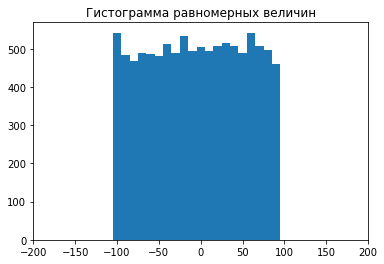

In [9]:
plot_histogram(uniform, 10, 'Гистограмма равномерных величин')

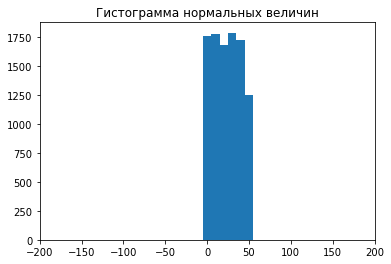

In [10]:
plot_histogram(normal, 10, 'Гистограмма нормальных величин')

In [16]:
# Двумерные данные
def random_normal():
    """
    возвращает нормальную выборку стандартного нормального отклонения
    """
    return inverse_normal_cdf(random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

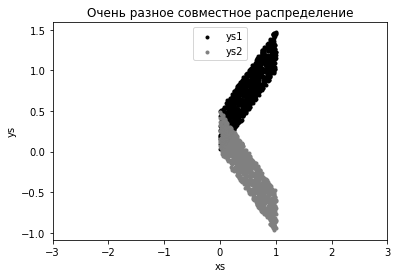

In [19]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='grey', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.xlim([-3, 3])
plt.legend(loc=9)
plt.title('Очень разное совместное распределение')
plt.show()

In [36]:
# (Скопировал из statistic.ipynb) 
def mean(x):
    return sum(x) / len(x)

def de_mean(x):
    """
    Вектор отклонений от среднего
    пересчитать x, вычтя его среднее (среднее результата будет = 0)
    """
    x_bar = mean(x)
    
    return [x_i - x_bar for x_i in x]

def dot(v, w):
    """
    v_1 * w_1 + ... + v_n * w_n
    """
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

# сумма квадратов вектора
def sum_of_squares(v):
    """
    v_1 * v_1 + ... + v_n * v_n
    """
    return dot(v, v)

def variance(x):
    """
    дисперсия - средняя сумма квадратов отклонений от среднего
    """
    n = len(x)
    deviations = de_mean(x)
    
    return sum_of_squares(deviations) / (n - 1)

# стандартное отклонение
def standart_deviation(x):
    return math.sqrt(variance(x))

# ковариация - совместное отклонение переменных от их среднего
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / n - 1

# корреляция
def correlation(x, y):
    """
    
    """
    stdev_x = standart_deviation(x)
    stdev_y = standart_deviation(y)
    
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

print(correlation(xs, ys1))
print(correlation(xs, ys2))

-9.456485946925602
-11.3742000962171


In [37]:
# Многомерные матрицы
def make_matrix(num_rows, num_cols, entry_fn):
    """
    создает матрицу по переданным параметрам
    """
    return [[entry_fn(i, j)
           for j in range(num_cols)]
           for i in range(num_rows)]

def correlation_matrix(data):
    _, num_columns = shape(data)
    
    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))
    
    return make_matrix(num_columns, num_columns, matrix_entry)